<H2>NOTE:  For data preparation for this study, please refer to <a href='Data_Preparation.ipynb'>Data_Preparation.ipynb</a></H2>

<H1>Exploratory Data Analysis</H1>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
df_sydney = pd.read_csv('resources/sydney_suburb_profiles.csv')
df_sydney.head()

,Postcode,Suburb,Direction,Distance (km),Latitude,Longitude,Population,Density (/km2),Area (km2),Total Crime,...,Unit Price 2017,Unit Price Change (1 yr),Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport
0,2176,Abbotsbury,West,31.4,-33.87285,150.86721,4253,3272.0,1.3,121,...,0,0.00,0,0,0,0,1,0,2,1
1,2046,Abbotsford,West,7.4,-33.85041,151.12846,5373,5373.0,1,158,...,1162000,-5.34,0,0,5,0,1,0,1,0
2,2325,Aberdare,North,115.2,-32.84186,151.36986,2473,750.0,3.2961,271,...,261250,6.22,0,0,1,1,0,0,1,1
3,2763,Acacia Gardens,West,31.0,-33.73240,150.91300,3798,3798.0,1,60,...,700000,0.75,0,0,1,0,1,0,0,0
4,2289,Adamstown,North-east,114.7,-32.93434,151.72587,6044,2015.0,3,656,...,447500,8.38,0,0,3,2,0,0,1,0


In [351]:
df_sydney.shape

(709, 28)

In [352]:
df_sydney = df_sydney.fillna(0)

In [353]:
df_sydney = df_sydney.loc[df_sydney['Density (/km2)'] > 0]

In [354]:
df_sydney.shape

(304, 28)

In [355]:
df_sydney.columns

Index(['Postcode', 'Suburb', 'Direction', 'Distance (km)', 'Latitude',
       'Longitude', 'Population', 'Density (/km2)', 'Area (km2)',
       'Total Crime', 'House Median Price', 'House Rent (PW)',
       'Unit Median Price', 'Unit Rent (PW)', 'House Price 2018',
       'House Price 2017', 'House Price Change (1 yr)', 'Unit Price 2018',
       'Unit Price 2017', 'Unit Price Change (1 yr)', 'Arts & Entertainment',
       'College & University', 'Food', 'Nightlife Spot',
       'Outdoors & Recreation', 'Professional & Other Places',
       'Shop & Service', 'Travel & Transport'],
      dtype='object')

In [356]:
df_sydney = df_sydney[['Postcode', 'Suburb', 'Distance (km)', 'Latitude', 'Longitude', 'Density (/km2)',
       'Population', 
       'Total Crime', 'House Median Price', 
       'House Price Change (1 yr)',
       'Arts & Entertainment',
       'College & University', 'Food', 'Nightlife Spot',
       'Outdoors & Recreation', 'Professional & Other Places',
       'Shop & Service', 'Travel & Transport']]
df_sydney.head()

,Postcode,Suburb,Distance (km),Latitude,Longitude,Density (/km2),Population,Total Crime,House Median Price,House Price Change (1 yr),Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport
0,2176,Abbotsbury,31.4,-33.87285,150.86721,3272.0,4253,121,1048750,9.50,0,0,0,0,1,0,2,1
1,2046,Abbotsford,7.4,-33.85041,151.12846,5373.0,5373,158,2810000,34.76,0,0,5,0,1,0,1,0
2,2325,Aberdare,115.2,-32.84186,151.36986,750.0,2473,271,366000,7.95,0,0,1,1,0,0,1,1
3,2763,Acacia Gardens,31.0,-33.73240,150.91300,3798.0,3798,60,820000,-6.86,0,0,1,0,1,0,0,0
4,2289,Adamstown,114.7,-32.93434,151.72587,2015.0,6044,656,701000,0.63,0,0,3,2,0,0,1,0


In [357]:
df_sydney.dtypes

Postcode                         int64
Suburb                          object
Distance (km)                  float64
Latitude                       float64
Longitude                      float64
Density (/km2)                 float64
Population                      object
Total Crime                      int64
House Median Price              object
House Price Change (1 yr)      float64
Arts & Entertainment             int64
College & University             int64
Food                             int64
Nightlife Spot                   int64
Outdoors & Recreation            int64
Professional & Other Places      int64
Shop & Service                   int64
Travel & Transport               int64
dtype: object

In [358]:
# Remove rows that have population which are not numeric data 
df_sydney = df_sydney[df_sydney['Population'].apply(lambda x: x.isnumeric())]
df_sydney.shape

(303, 18)

In [359]:
# Change datatype of Popullation to int
df_sydney['Population'] = df_sydney['Population'].astype(int)
df_sydney.dtypes

Postcode                         int64
Suburb                          object
Distance (km)                  float64
Latitude                       float64
Longitude                      float64
Density (/km2)                 float64
Population                       int64
Total Crime                      int64
House Median Price              object
House Price Change (1 yr)      float64
Arts & Entertainment             int64
College & University             int64
Food                             int64
Nightlife Spot                   int64
Outdoors & Recreation            int64
Professional & Other Places      int64
Shop & Service                   int64
Travel & Transport               int64
dtype: object

In [360]:
df_sydney = df_sydney.loc[df_sydney['House Median Price'] != 'no data']
df_sydney['House Median Price'] = df_sydney['House Median Price'].astype(int)
df_sydney.dtypes

Postcode                         int64
Suburb                          object
Distance (km)                  float64
Latitude                       float64
Longitude                      float64
Density (/km2)                 float64
Population                       int64
Total Crime                      int64
House Median Price               int64
House Price Change (1 yr)      float64
Arts & Entertainment             int64
College & University             int64
Food                             int64
Nightlife Spot                   int64
Outdoors & Recreation            int64
Professional & Other Places      int64
Shop & Service                   int64
Travel & Transport               int64
dtype: object

In [363]:
df_sydney = df_sydney.loc[df_sydney['Distance (km)'] < 30]

In [364]:
df_sydney.shape

(134, 18)

In [365]:
df_sydney.reset_index(drop=True, inplace =True)

In [366]:
df_sydney.tail()

,Postcode,Suburb,Distance (km),Latitude,Longitude,Density (/km2),Population,Total Crime,House Median Price,House Price Change (1 yr),Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport
129,2068,Willoughby,7.4,-33.80725,151.19935,2031.0,6540,184,2150000,-9.28,0,0,10,1,4,0,1,2
130,2065,Wollstonecraft,4.1,-33.83149,151.19689,6936.0,8323,198,2800000,4.11,0,0,0,0,1,0,1,2
131,1350,Woollahra,3.7,-33.88958,151.24795,6020.0,7405,283,3200000,0.00,3,0,50,5,6,0,17,1
132,2199,Yagoona,17.3,-33.90524,151.01009,4030.0,18013,1213,840000,-5.78,0,0,1,0,0,0,1,0
133,2017,Zetland,4.8,-33.90754,151.20756,12598.0,10078,493,1380000,-8.61,1,0,14,0,2,0,3,4


In [367]:
df_sydney.describe()

,Postcode,Distance (km),Latitude,Longitude,Density (/km2),Population,Total Crime,House Median Price,House Price Change (1 yr),Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport
count,134.000000,134.000000,134.000000,134.000000,134.00000,134.000000,134.000000,1.340000e+02,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,1982.761194,12.077612,-33.810322,151.144196,4201.12000,10671.477612,968.746269,1.773083e+06,-6.662313,0.447761,0.007463,13.500000,1.619403,1.656716,0.052239,3.104478,0.873134
std,229.576930,7.877852,0.399788,0.168780,2792.39196,6566.121473,1513.534765,8.653493e+05,10.464130,1.073027,0.086387,15.417864,3.045506,1.798514,0.223343,3.414407,1.185258
min,1300.000000,1.000000,-34.084150,150.882730,363.00000,860.000000,22.000000,6.950000e+05,-60.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.500000,5.450000,-33.892965,151.080858,2195.00000,5999.750000,248.500000,1.196875e+06,-11.032500,0.000000,0.000000,2.250000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,2066.000000,9.400000,-33.844810,151.155360,3617.00000,10080.000000,487.500000,1.550000e+06,-7.455000,0.000000,0.000000,8.500000,1.000000,1.000000,0.000000,2.000000,1.000000
75%,2119.750000,17.925000,-33.795402,151.202933,5471.25000,13453.250000,907.000000,2.217500e+06,-1.667500,0.000000,0.000000,17.000000,1.750000,2.000000,0.000000,4.000000,1.000000
max,2234.000000,29.900000,-29.300000,152.716670,13677.00000,29822.000000,10620.000000,5.360000e+06,34.760000,7.000000,1.000000,77.000000,18.000000,13.000000,1.000000,18.000000,7.000000


From the above descriptive statistics, I have identified a few features that need further analysis to determine any outliers or abnomalities.  The features that I am going to explore further are:
<ul>
    <li>Population</li>
    <li>House Median Price
    <li>Total Crime</li>
    <li>Density</li>
    <li>Other venue categories</li>
</ul>

<H3>Explore the population</H3>

Let's explore the population of the dataset by ploting a boxplot.

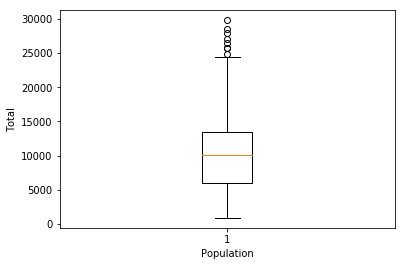

In [368]:
fig, ax = plt.subplots()
ax.boxplot(df_sydney['Population'])
ax.set_xlabel('Population')
ax.set_ylabel('Total')
plt.show()

In [369]:
population_Q1 = df_sydney['Population'].quantile(0.25)
population_Q3 = df_sydney['Population'].quantile(0.75)
IQR = population_Q3 - population_Q1
IQR

7453.5

In [370]:
df_population_outliers = (df_sydney['Population'] < (population_Q1 - 1.5 * IQR)) | (df_sydney['Population'] > (population_Q3 + 1.5 * IQR))
df_population_outliers_index = df_population_outliers[df_population_outliers == True].index
df_population_outliers_index

Int64Index([28, 62, 63, 74, 81, 95, 107, 113], dtype='int64')

<H3>Explore house price</H3>

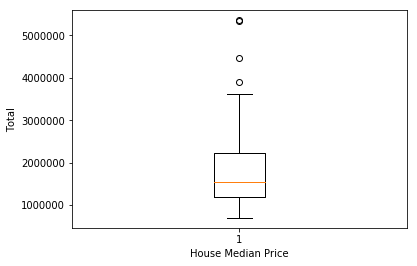

In [371]:
fig, ax = plt.subplots()
ax.boxplot(df_sydney['House Median Price'])
ax.set_xlabel('House Median Price')
ax.set_ylabel('Total')
plt.show()

Now, let's use IQR to retrieve the list of outliers for House Median Price.

In [372]:
house_price_Q1 = df_sydney['House Median Price'].quantile(0.25)
house_price_Q3 = df_sydney['House Median Price'].quantile(0.75)
IQR = house_price_Q3 - house_price_Q1
IQR

1020625.0

In [373]:
df_house_price_outliers = (df_sydney['House Median Price'] < (house_price_Q1 - 1.5 * IQR)) | (df_sydney['House Median Price'] > (house_price_Q3 + 1.5 * IQR))
df_house_price_outliers_index = df_house_price_outliers[df_house_price_outliers == True].index
df_house_price_outliers_index

Int64Index([37, 79, 81, 111], dtype='int64')

<H3>Explore the crime</H3>

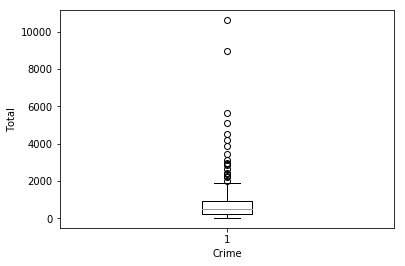

In [374]:
fig, ax = plt.subplots()
ax.boxplot(df_sydney['Total Crime'])
ax.set_xlabel('Crime')
ax.set_ylabel('Total')
plt.show()

In [375]:
crime_Q1 = df_sydney['Total Crime'].quantile(0.25)
crime_Q3 = df_sydney['Total Crime'].quantile(0.75)
IQR = crime_Q3 - crime_Q1
IQR

658.5

In [376]:
df_crime_outliers = (df_sydney['Total Crime'] < (crime_Q1 - 1.5 * IQR)) | (df_sydney['Total Crime'] > (crime_Q3 + 1.5 * IQR))
df_crime_outliers_index = df_crime_outliers[df_crime_outliers == True].index
df_crime_outliers_index

Int64Index([4, 13, 19, 20, 28, 36, 48, 53, 55, 62, 74, 75, 85, 95, 99, 100,
            113, 114],
           dtype='int64')

<H3>Explore Density</H3>

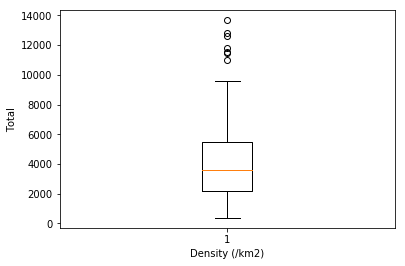

In [377]:
fig, ax = plt.subplots()
ax.boxplot(df_sydney['Density (/km2)'])
ax.set_xlabel('Density (/km2)')
ax.set_ylabel('Total')
plt.show()

In [378]:
density_Q1 = df_sydney['Density (/km2)'].quantile(0.25)
density_Q3 = df_sydney['Density (/km2)'].quantile(0.75)
IQR = density_Q3 - density_Q1
IQR

3276.25

In [379]:
df_density_outliers = (df_sydney['Density (/km2)'] < (density_Q1 - 1.5 * IQR)) | (df_sydney['Density (/km2)'] > (density_Q3 + 1.5 * IQR))
df_density_outliers_index = df_density_outliers[df_density_outliers == True].index
df_density_outliers_index

Int64Index([11, 13, 36, 99, 100, 114, 133], dtype='int64')

<H3>Remove all outliers from dataset</H3>

In [380]:
all_outliers_index = df_population_outliers_index.append(df_house_price_outliers_index).append(df_crime_outliers_index).append(df_density_outliers_index)
all_outliers_index

Int64Index([ 28,  62,  63,  74,  81,  95, 107, 113,  37,  79,  81, 111,   4,
             13,  19,  20,  28,  36,  48,  53,  55,  62,  74,  75,  85,  95,
             99, 100, 113, 114,  11,  13,  36,  99, 100, 114, 133],
           dtype='int64')

In [381]:
all_outliers_index.unique()

Int64Index([ 28,  62,  63,  74,  81,  95, 107, 113,  37,  79, 111,   4,  13,
             19,  20,  36,  48,  53,  55,  75,  85,  99, 100, 114,  11, 133],
           dtype='int64')

In [382]:
df_sydney.drop(df_sydney.index[all_outliers_index.unique()], inplace=True)
df_sydney.head()

,Postcode,Suburb,Distance (km),Latitude,Longitude,Density (/km2),Population,Total Crime,House Median Price,House Price Change (1 yr),Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport
0,2046,Abbotsford,7.4,-33.85041,151.12846,5373.0,5373,158,2810000,34.76,0,0,5,0,1,0,1,0
1,1435,Alexandria,4.1,-33.91237,151.19703,1540.0,8262,1190,1400000,-14.11,0,0,15,1,1,0,5,0
2,2205,Arncliffe,9.5,-33.93665,151.14679,2942.0,10590,627,1170000,-11.87,0,0,2,0,1,0,3,1
3,1570,Artarmon,6.7,-33.80815,151.18382,3809.0,9523,444,2430000,-0.93,0,0,15,0,0,0,3,0
5,2041,Balmain,2.9,-33.85600,151.17587,6969.0,10453,663,1877500,-8.27,0,0,29,7,4,0,2,1


In [383]:
df_sydney.shape

(108, 18)

In [384]:
df_sydney.reset_index(drop=True, inplace=True)
df_sydney.tail()

,Postcode,Suburb,Distance (km),Latitude,Longitude,Density (/km2),Population,Total Crime,House Median Price,House Price Change (1 yr),Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport
103,2145,Westmead,21.5,-33.81450,150.98467,5624.0,16309,1203,957500,-32.75,0,0,1,0,1,0,0,2
104,2068,Willoughby,7.4,-33.80725,151.19935,2031.0,6540,184,2150000,-9.28,0,0,10,1,4,0,1,2
105,2065,Wollstonecraft,4.1,-33.83149,151.19689,6936.0,8323,198,2800000,4.11,0,0,0,0,1,0,1,2
106,1350,Woollahra,3.7,-33.88958,151.24795,6020.0,7405,283,3200000,0.00,3,0,50,5,6,0,17,1
107,2199,Yagoona,17.3,-33.90524,151.01009,4030.0,18013,1213,840000,-5.78,0,0,1,0,0,0,1,0


In [385]:
df_sydney.describe()

,Postcode,Distance (km),Latitude,Longitude,Density (/km2),Population,Total Crime,House Median Price,House Price Change (1 yr),Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,1.080000e+02,108.000000,108.000000,108.0,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,2001.583333,12.571296,-33.797659,151.145643,3531.800000,9084.851852,486.166667,1.713549e+06,-6.200278,0.203704,0.0,9.768519,1.000000,1.527778,0.055556,2.611111,0.740741
std,217.482371,7.666690,0.444110,0.180507,2036.710633,4981.557188,406.082458,7.052592e+05,10.633687,0.525237,0.0,12.299690,1.629173,1.851790,0.230129,2.947622,1.044526
min,1350.000000,2.700000,-34.084150,150.882730,363.000000,860.000000,22.000000,6.950000e+05,-60.450000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2032.750000,6.200000,-33.890517,151.078313,2025.250000,5566.250000,194.500000,1.190000e+06,-10.237500,0.000000,0.0,1.750000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2069.500000,10.150000,-33.831425,151.151525,3323.500000,8838.500000,413.500000,1.550000e+06,-7.180000,0.000000,0.0,6.000000,0.000000,1.000000,0.000000,2.000000,0.000000
75%,2120.500000,18.150000,-33.792435,151.200983,4611.750000,11382.250000,630.500000,2.165000e+06,-1.080000,0.000000,0.0,13.000000,1.000000,2.000000,0.000000,3.000000,1.000000
max,2234.000000,29.900000,-29.300000,152.716670,9554.000000,24396.000000,1869.000000,3.612500e+06,34.760000,3.000000,0.0,77.000000,7.000000,13.000000,1.000000,17.000000,7.000000


<H3>Histogram to show data distribution after outliers are removed</H3>

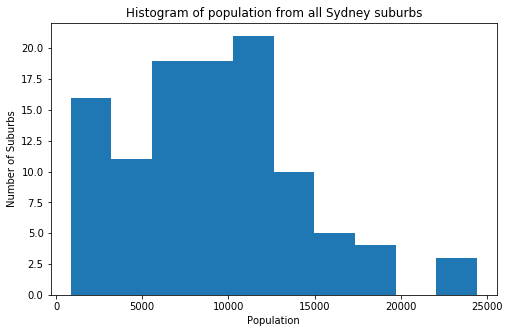

In [386]:
df_sydney['Population'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of population from all Sydney suburbs') # add a title to the histogram
plt.ylabel('Number of Suburbs') # add y-label
plt.xlabel('Population') # add x-label

plt.show()


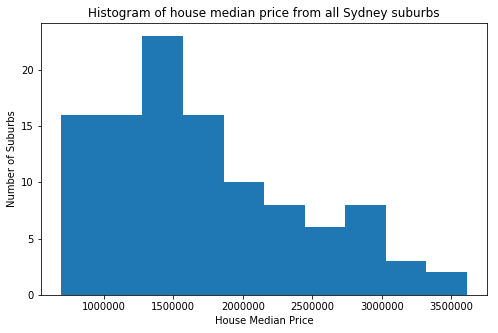

In [387]:
df_sydney['House Median Price'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of house median price from all Sydney suburbs') # add a title to the histogram
plt.ylabel('Number of Suburbs') # add y-label
plt.xlabel('House Median Price') # add x-label

plt.show()


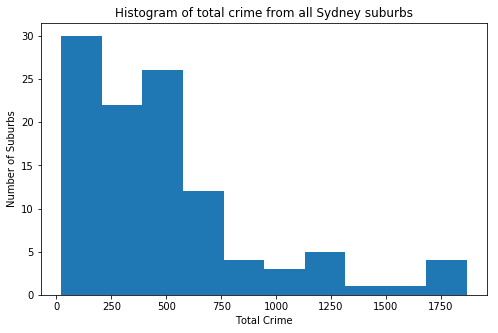

In [388]:
df_sydney['Total Crime'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of total crime from all Sydney suburbs') # add a title to the histogram
plt.ylabel('Number of Suburbs') # add y-label
plt.xlabel('Total Crime') # add x-label

plt.show()

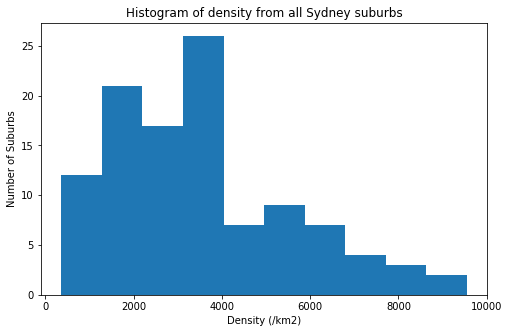

In [389]:
df_sydney['Density (/km2)'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of density from all Sydney suburbs') # add a title to the histogram
plt.ylabel('Number of Suburbs') # add y-label
plt.xlabel('Density (/km2)') # add x-label

plt.show()

<H3>Explore the venues from FourSquare</H3>

   Arts & Entertainment  College & University  Food  Nightlife Spot  \
0                    17                     0    98              49   

   Outdoors & Recreation  Professional & Other Places  Shop & Service  \
0                     80                            6              85   

   Travel & Transport  
0                  52  


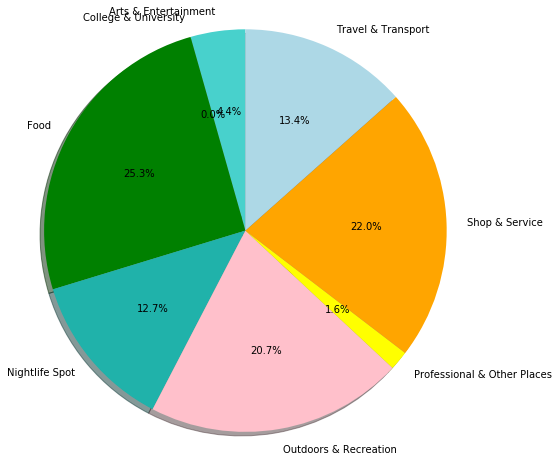

In [390]:
venues = []
venues.append(df_sydney.loc[df_sydney['Arts & Entertainment'] > 0, 'Arts & Entertainment'].count())
venues.append(df_sydney.loc[df_sydney['College & University'] > 0, 'College & University'].count())
venues.append(df_sydney.loc[df_sydney['Food'] > 0, 'Food'].count())
venues.append(df_sydney.loc[df_sydney['Nightlife Spot'] > 0, 'Nightlife Spot'].count())
venues.append(df_sydney.loc[df_sydney['Outdoors & Recreation'] > 0, 'Outdoors & Recreation'].count())
venues.append(df_sydney.loc[df_sydney['Professional & Other Places'] > 0, 'Professional & Other Places'].count())
venues.append(df_sydney.loc[df_sydney['Shop & Service'] > 0, 'Shop & Service'].count())
venues.append(df_sydney.loc[df_sydney['Travel & Transport'] > 0, 'Travel & Transport'].count())

df_venues = pd.DataFrame(data=venues)
df_venues = df_venues.transpose()
df_venues.columns = ['Arts & Entertainment', 'College & University', 'Food', 'Nightlife Spot', 'Outdoors & Recreation', 'Professional & Other Places', 'Shop & Service', 'Travel & Transport']

print(df_venues)

labels = df_venues.columns
sizes = venues
color_list = ['mediumturquoise', 'black', 'green', 'lightseagreen', 'pink', 'yellow', 'orange', 'lightblue']
explode = (0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, explode=explode, labels=labels, colors=color_list, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [391]:
df_sydney = df_sydney.loc[df_sydney['Food'] > 0]
df_sydney.shape

(98, 18)

In [392]:
df_sydney.reset_index(drop=True, inplace=True)

In [393]:
df_sydney.tail()

,Postcode,Suburb,Distance (km),Latitude,Longitude,Density (/km2),Population,Total Crime,House Median Price,House Price Change (1 yr),Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport
93,1685,West Ryde,12.8,-33.80752,151.08688,3752.0,13394,498,1433750,-16.09,0,0,13,1,1,0,8,2
94,2145,Westmead,21.5,-33.81450,150.98467,5624.0,16309,1203,957500,-32.75,0,0,1,0,1,0,0,2
95,2068,Willoughby,7.4,-33.80725,151.19935,2031.0,6540,184,2150000,-9.28,0,0,10,1,4,0,1,2
96,1350,Woollahra,3.7,-33.88958,151.24795,6020.0,7405,283,3200000,0.00,3,0,50,5,6,0,17,1
97,2199,Yagoona,17.3,-33.90524,151.01009,4030.0,18013,1213,840000,-5.78,0,0,1,0,0,0,1,0


In [394]:
df_sydney.drop(['College & University', 'Professional & Other Places', 'Arts & Entertainment'], axis=1, inplace=True)
df_sydney.shape

(98, 15)

<H3>Relationship between Population and Total Crime</H3>

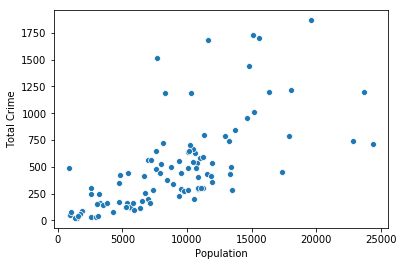

In [395]:
ax = sns.scatterplot(y="Total Crime", x="Population", data=df_sydney)

In [396]:
df_sydney['Crime Rate'] = round((df_sydney['Total Crime']/df_sydney['Population'])*100, 2)
df_sydney.head()

,Postcode,Suburb,Distance (km),Latitude,Longitude,Density (/km2),Population,Total Crime,House Median Price,House Price Change (1 yr),Food,Nightlife Spot,Outdoors & Recreation,Shop & Service,Travel & Transport,Crime Rate
0,2046,Abbotsford,7.4,-33.85041,151.12846,5373.0,5373,158,2810000,34.76,5,0,1,1,0,2.94
1,1435,Alexandria,4.1,-33.91237,151.19703,1540.0,8262,1190,1400000,-14.11,15,1,1,5,0,14.40
2,2205,Arncliffe,9.5,-33.93665,151.14679,2942.0,10590,627,1170000,-11.87,2,0,1,3,1,5.92
3,1570,Artarmon,6.7,-33.80815,151.18382,3809.0,9523,444,2430000,-0.93,15,0,0,3,0,4.66
4,2041,Balmain,2.9,-33.85600,151.17587,6969.0,10453,663,1877500,-8.27,29,7,4,2,1,6.34


<H3>Relationship between Food and Density</H3>

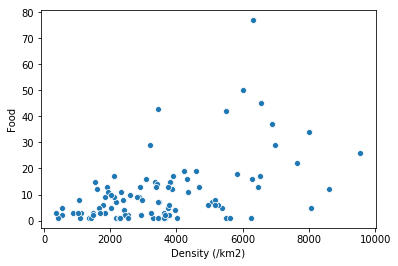

In [397]:
ax = sns.scatterplot(y="Food", x="Density (/km2)", data=df_sydney)

<H3>Relationship between Density and House Median Price</H3>

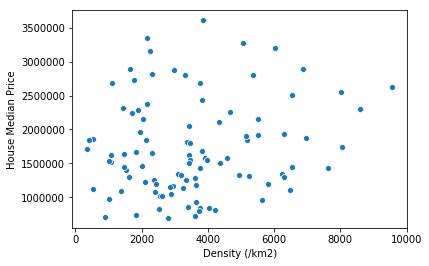

In [398]:
ax = sns.scatterplot(y="House Median Price", x="Density (/km2)", data=df_sydney)

<H3>Relationship between Distance and House Median Price</H3>

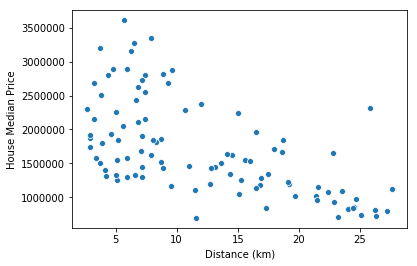

In [399]:
ax = sns.scatterplot(y="House Median Price", x="Distance (km)", data=df_sydney)

<H3>Relationship between Crime Rate and House Median Price</H3>

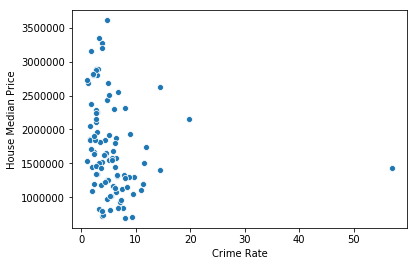

In [400]:
ax = sns.scatterplot(y="House Median Price", x="Crime Rate", data=df_sydney)

In [401]:
df_sydney.to_csv("resources/sydney_suburb_profiles_final2.csv", index=False)

In [402]:
df_sydney.head()

,Postcode,Suburb,Distance (km),Latitude,Longitude,Density (/km2),Population,Total Crime,House Median Price,House Price Change (1 yr),Food,Nightlife Spot,Outdoors & Recreation,Shop & Service,Travel & Transport,Crime Rate
0,2046,Abbotsford,7.4,-33.85041,151.12846,5373.0,5373,158,2810000,34.76,5,0,1,1,0,2.94
1,1435,Alexandria,4.1,-33.91237,151.19703,1540.0,8262,1190,1400000,-14.11,15,1,1,5,0,14.40
2,2205,Arncliffe,9.5,-33.93665,151.14679,2942.0,10590,627,1170000,-11.87,2,0,1,3,1,5.92
3,1570,Artarmon,6.7,-33.80815,151.18382,3809.0,9523,444,2430000,-0.93,15,0,0,3,0,4.66
4,2041,Balmain,2.9,-33.85600,151.17587,6969.0,10453,663,1877500,-8.27,29,7,4,2,1,6.34


<H1>Modeling</H1>

In [2]:
df_sydney = pd.read_csv('resources/sydney_suburb_profiles_final2.csv')
df_sydney.shape

(98, 16)

<H3>K Mean</H3>

<H3>Clustering based on distance, density, crime rate, food, outdoors & recreation and shop & service</H3>

In [404]:
df_sydney_kmean1 = df_sydney.copy(deep=True)
df_sydney_kmean1.shape

(98, 16)

In [ ]:
X = df_sydney_kmean1[['Distance (km)', 'Density (/km2)', 'Crime Rate', 
       'Food', 'Outdoors & Recreation',
       'Shop & Service']].values
X[0:]

In [406]:
from sklearn.decomposition import PCA

X = np.nan_to_num(X)
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_) 

[0.46226717 0.17497871]
[16.4867551  10.14334676]


In [407]:
X_reduced.shape

(98, 2)

In [ ]:
X_reduced

In [408]:
df_pca = pd.DataFrame(X_reduced)
df_pca.columns = ['Feature 1', 'Feature 2']
df_pca.head()

,Feature 1,Feature 2
0,-0.070716,-0.638610
1,0.741899,0.876641
2,-0.414880,0.059331
3,0.178078,-0.038028
4,2.335348,-1.246761


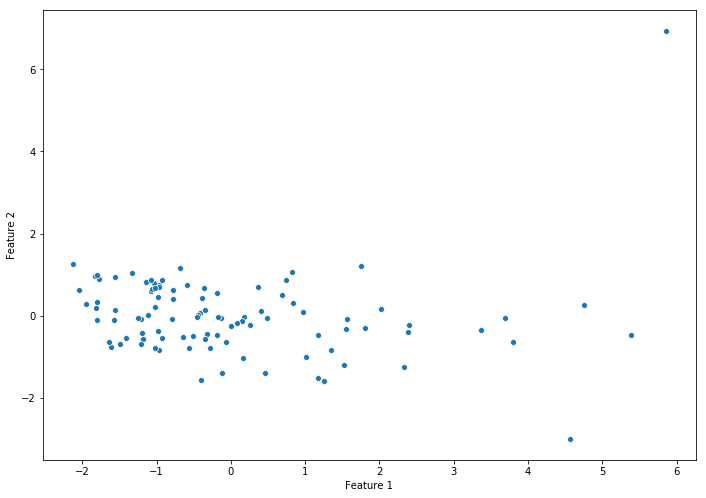

In [409]:
import seaborn as sns

a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax, data=df_pca, x="Feature 1", y="Feature 2")

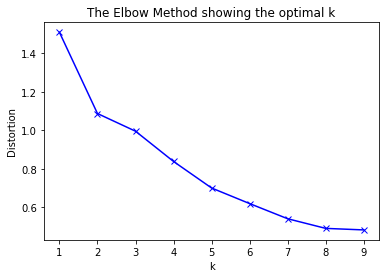

In [410]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_reduced.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [411]:
num_clusters = 2

k_means = KMeans(init="k-means++", n_clusters=num_clusters, random_state=1)
k_means.fit(X_reduced)
labels = k_means.labels_

print(labels)

[0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [412]:
df_pca.insert(len(df_pca.columns), 'Cluster Labels', labels)
df_pca.head()

,Feature 1,Feature 2,Cluster Labels
0,-0.070716,-0.638610,0
1,0.741899,0.876641,0
2,-0.414880,0.059331,0
3,0.178078,-0.038028,0
4,2.335348,-1.246761,1


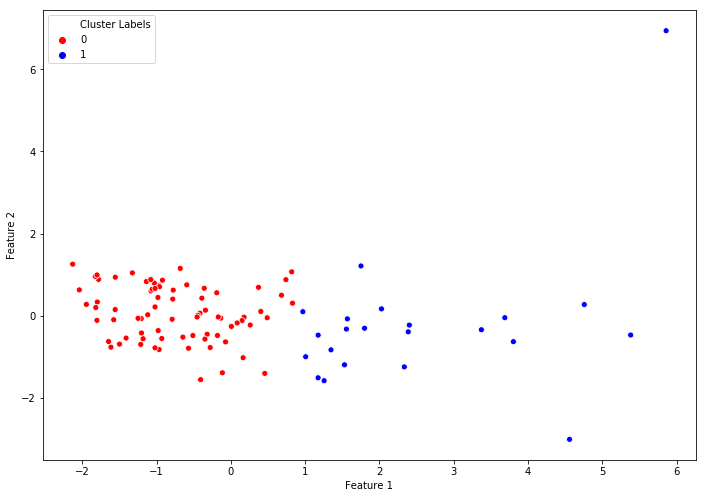

In [414]:
import seaborn as sns

a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax, data=df_pca, x="Feature 1", y="Feature 2", hue="Cluster Labels", palette=['red', 'blue'])


In [415]:
df_sydney_kmean1.insert(len(df_sydney_kmean1.columns), 'Cluster Labels', labels)
df_sydney_kmean1.head()

,Postcode,Suburb,Distance (km),Latitude,Longitude,Density (/km2),Population,Total Crime,House Median Price,House Price Change (1 yr),Food,Nightlife Spot,Outdoors & Recreation,Shop & Service,Travel & Transport,Crime Rate,Cluster Labels
0,2046,Abbotsford,7.4,-33.85041,151.12846,5373.0,5373,158,2810000,34.76,5,0,1,1,0,2.94,0
1,1435,Alexandria,4.1,-33.91237,151.19703,1540.0,8262,1190,1400000,-14.11,15,1,1,5,0,14.40,0
2,2205,Arncliffe,9.5,-33.93665,151.14679,2942.0,10590,627,1170000,-11.87,2,0,1,3,1,5.92,0
3,1570,Artarmon,6.7,-33.80815,151.18382,3809.0,9523,444,2430000,-0.93,15,0,0,3,0,4.66,0
4,2041,Balmain,2.9,-33.85600,151.17587,6969.0,10453,663,1877500,-8.27,29,7,4,2,1,6.34,1


In [416]:
df_sydney_kmean1_cluster0 = df_sydney_kmean1.loc[df_sydney_kmean1['Cluster Labels'] == 0]
df_sydney_kmean1_cluster0[['House Median Price', 'Distance (km)', 'Density (/km2)', 'Crime Rate', 
       'Food', 'Outdoors & Recreation',
       'Shop & Service']].describe().round()

,House Median Price,Distance (km),Density (/km2),Crime Rate,Food,Outdoors & Recreation,Shop & Service
count,76.0,76.0,76.0,76.0,76.0,76.0,76.0
mean,1629355.0,14.0,2813.0,5.0,6.0,1.0,2.0
std,684579.0,7.0,1377.0,3.0,5.0,1.0,2.0
min,695000.0,3.0,363.0,1.0,1.0,0.0,0.0
25%,1136250.0,7.0,1822.0,3.0,2.0,0.0,0.0
50%,1507500.0,13.0,2706.0,4.0,5.0,1.0,1.0
75%,1935625.0,19.0,3671.0,6.0,10.0,1.0,3.0
max,3350000.0,28.0,6239.0,14.0,19.0,4.0,8.0


In [417]:
df_sydney_kmean1_cluster1 = df_sydney_kmean1.loc[df_sydney_kmean1['Cluster Labels'] == 1]
df_sydney_kmean1_cluster1[['House Median Price', 'Distance (km)', 'Density (/km2)', 'Crime Rate', 
       'Food', 'Outdoors & Recreation',
       'Shop & Service']].describe().round()

,House Median Price,Distance (km),Density (/km2),Crime Rate,Food,Outdoors & Recreation,Shop & Service
count,22.0,22.0,22.0,22.0,22.0,22.0,22.0
mean,2034761.0,6.0,6073.0,9.0,26.0,4.0,6.0
std,662596.0,3.0,1697.0,11.0,18.0,3.0,4.0
min,1100000.0,3.0,3204.0,3.0,5.0,1.0,1.0
25%,1483750.0,4.0,4739.0,5.0,13.0,2.0,3.0
50%,1903750.0,5.0,6302.0,6.0,20.0,4.0,4.0
75%,2453375.0,7.0,6949.0,9.0,36.0,5.0,8.0
max,3612500.0,14.0,9554.0,57.0,77.0,13.0,17.0


In [429]:
df_sydney_kmean1_cluster2 = df_sydney_kmean1.loc[df_sydney_kmean1['Cluster Labels'] == 2]
df_sydney_kmean1_cluster2[['House Median Price', 'Distance (km)', 'Density (/km2)', 'Crime Rate', 
       'Food', 'Outdoors & Recreation',
       'Shop & Service']].describe().round()

,House Median Price,Distance (km),Density (/km2),Crime Rate,Food,Outdoors & Recreation,Shop & Service
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<H3>Clustering based on distance, density, crime rate</H3>

In [430]:
df_sydney_kmean2 = df_sydney.copy(deep=True)
df_sydney_kmean2.shape

(98, 16)

In [ ]:
X = df_sydney_kmean2[['Distance (km)', 'Density (/km2)', 'Crime Rate']].values
X[0:]

In [432]:
from sklearn.decomposition import PCA

X = np.nan_to_num(X)
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_) 

[0.54019176 0.3045636 ]
[12.60223699  9.46264761]


In [433]:
df_pca = pd.DataFrame(X_reduced)
df_pca.columns = ['Feature 1', 'Feature 2']
df_pca.head()

,Feature 1,Feature 2
0,0.737827,-0.786322
1,0.602254,0.319871
2,-0.005795,-0.216845
3,0.392729,-0.632456
4,1.893236,-0.800508


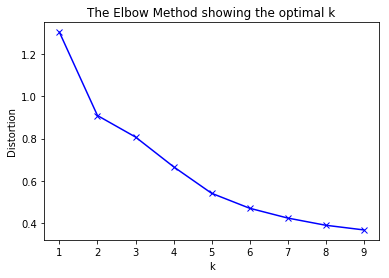

In [434]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_reduced.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [435]:
num_clusters = 2

k_means = KMeans(init="k-means++", n_clusters=num_clusters, random_state=1)
k_means.fit(X_reduced)
labels = k_means.labels_

print(labels)

[0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1
 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0
 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1]


In [436]:
df_pca.insert(len(df_pca.columns), 'Cluster Labels', labels)
df_pca.head()

,Feature 1,Feature 2,Cluster Labels
0,0.737827,-0.786322,0
1,0.602254,0.319871,0
2,-0.005795,-0.216845,1
3,0.392729,-0.632456,0
4,1.893236,-0.800508,0


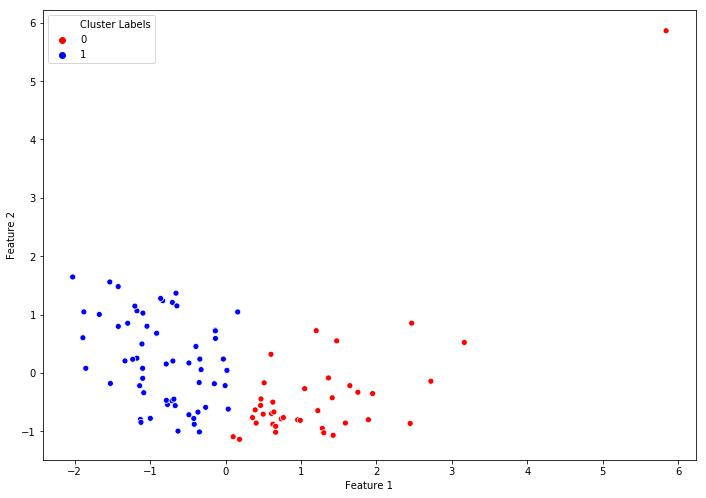

In [437]:
import seaborn as sns

a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax, data=df_pca, x="Feature 1", y="Feature 2", hue="Cluster Labels", palette=['red', 'blue'])


In [438]:
df_sydney_kmean2.insert(len(df_sydney_kmean2.columns), 'Cluster Labels', labels)
df_sydney_kmean2.head()

,Postcode,Suburb,Distance (km),Latitude,Longitude,Density (/km2),Population,Total Crime,House Median Price,House Price Change (1 yr),Food,Nightlife Spot,Outdoors & Recreation,Shop & Service,Travel & Transport,Crime Rate,Cluster Labels
0,2046,Abbotsford,7.4,-33.85041,151.12846,5373.0,5373,158,2810000,34.76,5,0,1,1,0,2.94,0
1,1435,Alexandria,4.1,-33.91237,151.19703,1540.0,8262,1190,1400000,-14.11,15,1,1,5,0,14.40,0
2,2205,Arncliffe,9.5,-33.93665,151.14679,2942.0,10590,627,1170000,-11.87,2,0,1,3,1,5.92,1
3,1570,Artarmon,6.7,-33.80815,151.18382,3809.0,9523,444,2430000,-0.93,15,0,0,3,0,4.66,0
4,2041,Balmain,2.9,-33.85600,151.17587,6969.0,10453,663,1877500,-8.27,29,7,4,2,1,6.34,0


In [439]:
df_cluster0 = df_sydney_kmean2.loc[df_sydney_kmean2['Cluster Labels'] == 0]
df_cluster0[['House Median Price', 'Distance (km)', 'Density (/km2)', 
            'Crime Rate']].describe().round()

,House Median Price,Distance (km),Density (/km2),Crime Rate
count,39.0,39.0,39.0,39.0
mean,1990940.0,6.0,5316.0,8.0
std,647407.0,3.0,1713.0,9.0
min,1100000.0,3.0,1540.0,2.0
25%,1442500.0,4.0,3888.0,4.0
50%,1877500.0,5.0,5173.0,6.0
75%,2466000.0,7.0,6392.0,8.0
max,3612500.0,14.0,9554.0,57.0


In [ ]:
df_cluster0

In [440]:
df_cluster1 = df_sydney_kmean2.loc[df_sydney_kmean2['Cluster Labels'] == 1]
df_cluster1[['House Median Price', 'Distance (km)', 'Density (/km2)', 
            'Crime Rate']].describe().round()

,House Median Price,Distance (km),Density (/km2),Crime Rate
count,59.0,59.0,59.0,59.0
mean,1541510.0,16.0,2374.0,4.0
std,675975.0,6.0,1093.0,2.0
min,695000.0,6.0,363.0,1.0
25%,1038750.0,10.0,1631.0,3.0
50%,1433750.0,16.0,2303.0,4.0
75%,1850000.0,22.0,3311.0,6.0
max,3350000.0,28.0,5624.0,10.0


In [ ]:
df_cluster1

<H3>Clustering based on House Price Level, Distance (km), Density (/km2), Food, Outdoors & Recreation, Shop & Service, Crime Rate</H3>

In [3]:
df_sydney_kmean3 = df_sydney.copy(deep=True)
df_sydney_kmean3.shape

(98, 16)

In [ ]:
X = df_sydney_kmean3[['House Median Price']].values
X[0:]

In [5]:
X = StandardScaler().fit_transform(X)

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


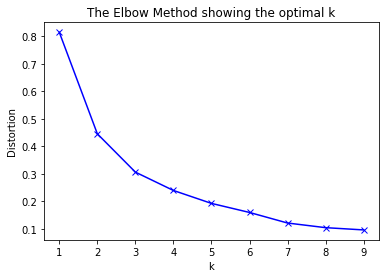

In [6]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [7]:
num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters, random_state=1)
k_means.fit(X)
labels = k_means.labels_

print(labels)

[1 2 2 1 0 2 2 0 2 0 1 0 1 2 0 0 2 2 2 1 1 0 0 1 1 1 0 0 2 2 2 0 0 0 2 2 2
 0 2 0 1 2 2 2 2 1 1 2 2 0 2 2 2 2 0 0 0 2 0 0 0 1 2 2 2 2 0 0 1 2 0 0 2 2
 0 2 1 0 1 0 2 1 0 0 2 2 0 0 0 2 1 2 0 2 2 0 1 2]


In [8]:
df_sydney_kmean3.insert(len(df_sydney_kmean3.columns), 'House Price Level', labels)
df_sydney_kmean3.head()

,Postcode,Suburb,Distance (km),Latitude,Longitude,Density (/km2),Population,Total Crime,House Median Price,House Price Change (1 yr),Food,Nightlife Spot,Outdoors & Recreation,Shop & Service,Travel & Transport,Crime Rate,House Price Level
0,2046,Abbotsford,7.4,-33.85041,151.12846,5373.0,5373,158,2810000,34.76,5,0,1,1,0,2.94,1
1,1435,Alexandria,4.1,-33.91237,151.19703,1540.0,8262,1190,1400000,-14.11,15,1,1,5,0,14.40,2
2,2205,Arncliffe,9.5,-33.93665,151.14679,2942.0,10590,627,1170000,-11.87,2,0,1,3,1,5.92,2
3,1570,Artarmon,6.7,-33.80815,151.18382,3809.0,9523,444,2430000,-0.93,15,0,0,3,0,4.66,1
4,2041,Balmain,2.9,-33.85600,151.17587,6969.0,10453,663,1877500,-8.27,29,7,4,2,1,6.34,0


In [9]:
df_cluster0 = df_sydney_kmean3.loc[df_sydney_kmean3['House Price Level'] == 0]
df_cluster0['House Median Price'].describe().round()

count         36.0
mean     1838938.0
std       256042.0
min      1502500.0
25%      1629375.0
50%      1834500.0
75%      1988750.0
max      2315000.0
Name: House Median Price, dtype: float64

In [13]:
df_cluster1 = df_sydney_kmean3.loc[df_sydney_kmean3['House Price Level'] == 1]
df_cluster1['House Median Price'].describe().round()

count         19.0
mean     2857316.0
std       331545.0
min      2375000.0
25%      2653050.0
50%      2810000.0
75%      3032500.0
max      3612500.0
Name: House Median Price, dtype: float64

In [14]:
df_cluster2 = df_sydney_kmean3.loc[df_sydney_kmean3['House Price Level'] == 2]
df_cluster2['House Median Price'].describe().round()

count         43.0
mean     1118721.0
std       232362.0
min       695000.0
25%       941250.0
50%      1150000.0
75%      1307500.0
max      1460000.0
Name: House Median Price, dtype: float64

In [ ]:
X = df_sydney_kmean3[['House Price Level', 'Distance (km)', 'Density (/km2)',
            'Food', 'Outdoors & Recreation', 
            'Shop & Service', 'Crime Rate']].values
X[0:]

In [11]:
from sklearn.decomposition import PCA

X = np.nan_to_num(X)
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_) 

[0.39956512 0.20871857]
[16.5560162 11.9658239]


In [12]:
df_pca = pd.DataFrame(X_reduced)
df_pca.columns = ['Feature 1', 'Feature 2']
df_pca.head()

,Feature 1,Feature 2
0,-0.039983,-0.565218
1,0.609984,1.102523
2,-0.529954,0.622011
3,0.200298,-0.269973
4,2.492477,-1.424937


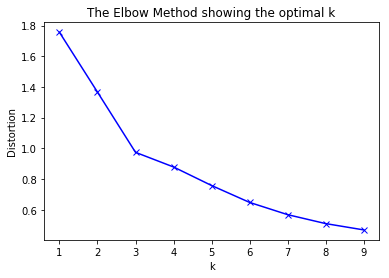

In [13]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_reduced.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [14]:
num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters, random_state=1)
k_means.fit(X_reduced)
labels = k_means.labels_

print(labels)

[0 1 1 0 2 1 1 0 1 0 2 0 0 1 0 0 1 1 1 0 0 0 1 0 2 2 2 2 2 1 2 0 2 0 1 1 1
 0 1 0 0 1 1 1 1 0 0 1 1 0 1 2 2 1 0 0 0 1 0 0 0 2 1 1 1 1 2 0 0 1 2 0 1 2
 0 2 0 0 0 2 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 2 1]


In [15]:
df_pca.insert(len(df_pca.columns), 'Cluster Labels', labels)
df_pca.head()

,Feature 1,Feature 2,Cluster Labels
0,-0.039983,-0.565218,0
1,0.609984,1.102523,1
2,-0.529954,0.622011,1
3,0.200298,-0.269973,0
4,2.492477,-1.424937,2


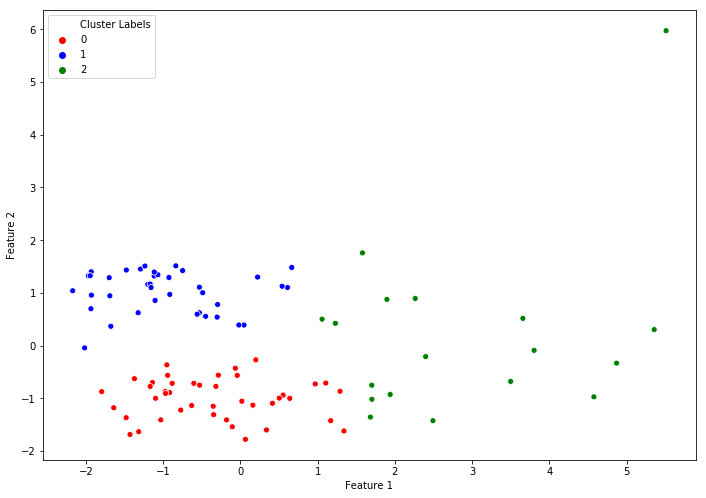

In [21]:
import seaborn as sns

a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax, data=df_pca, x="Feature 1", y="Feature 2", hue="Cluster Labels", palette=['red', 'blue', 'green'])


In [16]:
df_sydney_kmean3.insert(len(df_sydney_kmean3.columns), 'Cluster Labels', labels)
df_sydney_kmean3.head()

,Postcode,Suburb,Distance (km),Latitude,Longitude,Density (/km2),Population,Total Crime,House Median Price,House Price Change (1 yr),Food,Nightlife Spot,Outdoors & Recreation,Shop & Service,Travel & Transport,Crime Rate,House Price Level,Cluster Labels
0,2046,Abbotsford,7.4,-33.85041,151.12846,5373.0,5373,158,2810000,34.76,5,0,1,1,0,2.94,1,0
1,1435,Alexandria,4.1,-33.91237,151.19703,1540.0,8262,1190,1400000,-14.11,15,1,1,5,0,14.40,2,1
2,2205,Arncliffe,9.5,-33.93665,151.14679,2942.0,10590,627,1170000,-11.87,2,0,1,3,1,5.92,2,1
3,1570,Artarmon,6.7,-33.80815,151.18382,3809.0,9523,444,2430000,-0.93,15,0,0,3,0,4.66,1,0
4,2041,Balmain,2.9,-33.85600,151.17587,6969.0,10453,663,1877500,-8.27,29,7,4,2,1,6.34,0,2


In [23]:
df_cluster0 = df_sydney_kmean3.loc[df_sydney_kmean3['Cluster Labels'] == 0]
df_cluster0[['House Price Level', 'Distance (km)', 'Density (/km2)',
            'Food', 'Outdoors & Recreation', 
            'Shop & Service', 'Crime Rate']].mean().round()

House Price Level           0.0
Distance (km)               9.0
Density (/km2)           2804.0
Food                        8.0
Outdoors & Recreation       1.0
Shop & Service              2.0
Crime Rate                  3.0
dtype: float64

In [24]:
df_cluster1 = df_sydney_kmean3.loc[df_sydney_kmean3['Cluster Labels'] == 1]
df_cluster1[['House Price Level', 'Distance (km)', 'Density (/km2)',
            'Food', 'Outdoors & Recreation', 
            'Shop & Service', 'Crime Rate']].mean().round()

House Price Level           2.0
Distance (km)              18.0
Density (/km2)           2955.0
Food                        6.0
Outdoors & Recreation       1.0
Shop & Service              2.0
Crime Rate                  6.0
dtype: float64

In [25]:
df_cluster2 = df_sydney_kmean3.loc[df_sydney_kmean3['Cluster Labels'] == 2]
df_cluster2[['House Price Level', 'Distance (km)', 'Density (/km2)',
            'Food', 'Outdoors & Recreation', 
            'Shop & Service', 'Crime Rate']].mean().round()

House Price Level           1.0
Distance (km)               5.0
Density (/km2)           6518.0
Food                       27.0
Outdoors & Recreation       4.0
Shop & Service              6.0
Crime Rate                 11.0
dtype: float64

In [34]:
df_sydney.head()

,Postcode,Suburb,Distance (km),Latitude,Longitude,Density (/km2),Population,Total Crime,House Median Price,House Price Change (1 yr),Food,Nightlife Spot,Outdoors & Recreation,Shop & Service,Travel & Transport,Crime Rate
0,2046,Abbotsford,7.4,-33.85041,151.12846,5373.0,5373,158,2810000,34.76,5,0,1,1,0,2.94
1,1435,Alexandria,4.1,-33.91237,151.19703,1540.0,8262,1190,1400000,-14.11,15,1,1,5,0,14.40
2,2205,Arncliffe,9.5,-33.93665,151.14679,2942.0,10590,627,1170000,-11.87,2,0,1,3,1,5.92
3,1570,Artarmon,6.7,-33.80815,151.18382,3809.0,9523,444,2430000,-0.93,15,0,0,3,0,4.66
4,2041,Balmain,2.9,-33.85600,151.17587,6969.0,10453,663,1877500,-8.27,29,7,4,2,1,6.34






<H3>DBSCAN</H3>

In [17]:
df_sydney_dbscan = df_sydney_kmean3.copy(deep=True)
df_sydney_dbscan.drop(columns=['Cluster Labels'], axis=1, inplace=True)
df_sydney_dbscan.head()

,Postcode,Suburb,Distance (km),Latitude,Longitude,Density (/km2),Population,Total Crime,House Median Price,House Price Change (1 yr),Food,Nightlife Spot,Outdoors & Recreation,Shop & Service,Travel & Transport,Crime Rate,House Price Level
0,2046,Abbotsford,7.4,-33.85041,151.12846,5373.0,5373,158,2810000,34.76,5,0,1,1,0,2.94,1
1,1435,Alexandria,4.1,-33.91237,151.19703,1540.0,8262,1190,1400000,-14.11,15,1,1,5,0,14.40,2
2,2205,Arncliffe,9.5,-33.93665,151.14679,2942.0,10590,627,1170000,-11.87,2,0,1,3,1,5.92,2
3,1570,Artarmon,6.7,-33.80815,151.18382,3809.0,9523,444,2430000,-0.93,15,0,0,3,0,4.66,1
4,2041,Balmain,2.9,-33.85600,151.17587,6969.0,10453,663,1877500,-8.27,29,7,4,2,1,6.34,0


In [ ]:
X = df_sydney_kmean3[['House Price Level', 'Density (/km2)', 'Distance (km)', 'Crime Rate', 'Food' 
       ]].values
X[0:]

In [19]:
from sklearn.decomposition import PCA

X = np.nan_to_num(X)
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_) 

[0.41569923 0.27279092]
[14.27209242 11.56146842]


In [20]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)

#Clus_dataSet = StandardScaler().fit_transform(X)

# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=10).fit(X_reduced)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

print(labels)

[-1 -1  1 -1 -1  1 -1  0 -1  2 -1  0 -1  1  2  2  1  1  1  0  0 -1 -1  0
 -1 -1 -1  2 -1  1 -1  2 -1  0  1 -1  1  2 -1  2  0  1  1  1  1  0  0  1
 -1  2  1 -1 -1  1  2  0  0  1 -1  0  2 -1  1  1  1 -1 -1 -1  0  1 -1  0
  1 -1  0 -1 -1  2  0  2  1  0 -1  2  1  1  0  0  2  1 -1  1  0  1  1 -1
 -1  1]


### 

In [21]:
df_pca = pd.DataFrame(X_reduced)
df_pca.columns = ['Feature 1', 'Feature 2']
df_pca.insert(len(df_pca.columns), 'Cluster Labels', labels)
df_pca.head()

,Feature 1,Feature 2,Cluster Labels
0,0.465488,-0.352345,-1
1,0.382135,0.906173,-1
2,-0.592123,0.497231,1
3,0.587278,-0.374500,-1
4,2.676848,-0.737707,-1


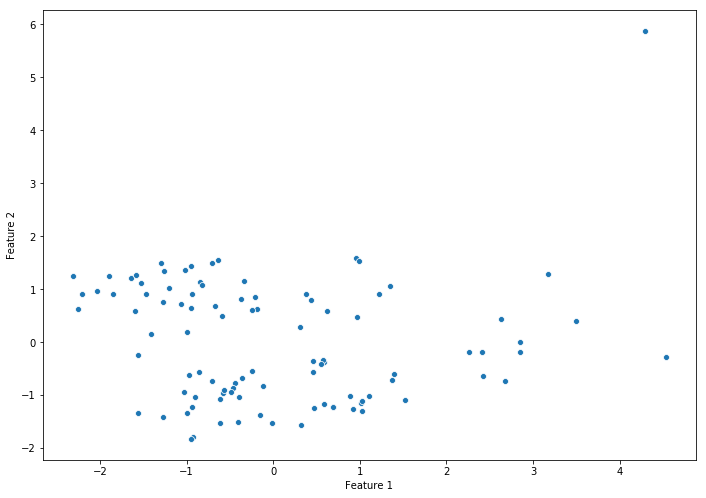

In [23]:
a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax, data=df_pca, x="Feature 1", y="Feature 2")


In [22]:
df_pca.drop(df_pca.loc[df_pca['Cluster Labels'] == -1].index, inplace=True)
df_pca.head()

,Feature 1,Feature 2,Cluster Labels
2,-0.592123,0.497231,1
5,-2.253777,0.621658,1
7,-0.902509,-1.039526,0
9,1.013219,-1.157769,2
11,-0.407408,-1.502688,0


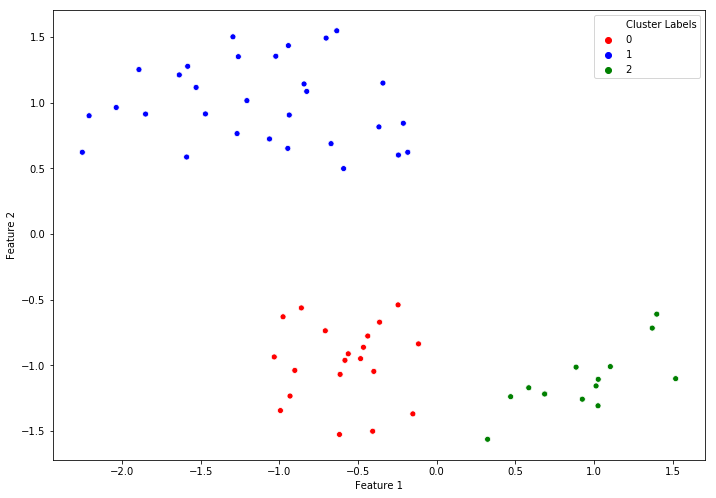

In [25]:
import seaborn as sns

a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax, data=df_pca, x="Feature 1", y="Feature 2", hue="Cluster Labels", palette=['red', 'blue', 'green'])


In [23]:
df_sydney_dbscan.insert(len(df_sydney_dbscan.columns), 'Cluster Labels', labels)
df_sydney_dbscan.head()

,Postcode,Suburb,Distance (km),Latitude,Longitude,Density (/km2),Population,Total Crime,House Median Price,House Price Change (1 yr),Food,Nightlife Spot,Outdoors & Recreation,Shop & Service,Travel & Transport,Crime Rate,House Price Level,Cluster Labels
0,2046,Abbotsford,7.4,-33.85041,151.12846,5373.0,5373,158,2810000,34.76,5,0,1,1,0,2.94,1,-1
1,1435,Alexandria,4.1,-33.91237,151.19703,1540.0,8262,1190,1400000,-14.11,15,1,1,5,0,14.40,2,-1
2,2205,Arncliffe,9.5,-33.93665,151.14679,2942.0,10590,627,1170000,-11.87,2,0,1,3,1,5.92,2,1
3,1570,Artarmon,6.7,-33.80815,151.18382,3809.0,9523,444,2430000,-0.93,15,0,0,3,0,4.66,1,-1
4,2041,Balmain,2.9,-33.85600,151.17587,6969.0,10453,663,1877500,-8.27,29,7,4,2,1,6.34,0,-1


In [27]:
df_sydney_dbscan.drop(df_sydney_dbscan.loc[df_sydney_dbscan['Cluster Labels'] == -1].index, inplace=True)
df_sydney_dbscan.sort_values(by='House Price Change (1 yr)', ascending=True)

,Postcode,Suburb,Distance (km),Latitude,Longitude,Density (/km2),Population,Total Crime,House Median Price,House Price Change (1 yr),Food,Nightlife Spot,Outdoors & Recreation,Shop & Service,Travel & Transport,Crime Rate,House Price Level,Cluster Labels
44,2140,Homebush,11.6,-33.86398,151.08232,2803.0,7007,566,695000,-60.45,9,1,0,3,1,8.08,2,1
94,2145,Westmead,21.5,-33.81450,150.98467,5624.0,16309,1203,957500,-32.75,1,0,1,0,2,7.38,2,1
64,1750,North Parramatta,19.7,-33.79832,151.01042,2548.0,13248,737,1023500,-26.63,1,1,1,3,1,5.56,2,1
93,1685,West Ryde,12.8,-33.80752,151.08688,3752.0,13394,498,1433750,-16.09,13,1,1,8,2,3.72,2,1
55,2070,Lindfield,10.7,-33.77519,151.16867,1894.0,9791,274,2289000,-15.85,13,0,0,2,1,2.80,0,0
63,2076,Normanhurst,19.2,-33.72113,151.09712,2438.0,5290,127,1195000,-14.97,2,0,0,0,2,2.40,2,1
87,2076,Wahroonga,18.7,-33.71843,151.11744,2118.0,17371,453,1850000,-12.79,17,0,2,3,1,2.61,0,0
46,2071,Killara,12.0,-33.76560,151.15682,2171.0,10574,200,2375000,-12.36,1,1,1,0,1,1.89,1,0
27,1470,Drummoyne,5.2,-33.85420,151.15750,5173.0,11950,534,1850000,-12.30,8,3,5,5,2,4.47,0,2
2,2205,Arncliffe,9.5,-33.93665,151.14679,2942.0,10590,627,1170000,-11.87,2,0,1,3,1,5.92,2,1


In [28]:
df_sydney_dbscan_cluster0 = df_sydney_dbscan.loc[df_sydney_dbscan['Cluster Labels'] == 0]
df_sydney_dbscan_cluster0[['House Median Price', 'Density (/km2)', 'Distance (km)', 'Crime Rate', 'Food']].mean().round()

House Median Price    2261408.0
Density (/km2)           2104.0
Distance (km)              12.0
Crime Rate                  3.0
Food                        6.0
dtype: float64

In [29]:
df_sydney_dbscan_cluster0.sort_values('House Price Change (1 yr)', ascending=True).head()

,Postcode,Suburb,Distance (km),Latitude,Longitude,Density (/km2),Population,Total Crime,House Median Price,House Price Change (1 yr),Food,Nightlife Spot,Outdoors & Recreation,Shop & Service,Travel & Transport,Crime Rate,House Price Level,Cluster Labels
55,2070,Lindfield,10.7,-33.77519,151.16867,1894.0,9791,274,2289000,-15.85,13,0,0,2,1,2.80,0,0
87,2076,Wahroonga,18.7,-33.71843,151.11744,2118.0,17371,453,1850000,-12.79,17,0,2,3,1,2.61,0,0
46,2071,Killara,12.0,-33.76560,151.15682,2171.0,10574,200,2375000,-12.36,1,1,1,0,1,1.89,1,0
56,2122,Marsfield,13.6,-33.78032,151.10236,3445.0,13297,434,1502500,-11.24,1,0,2,0,1,3.26,0,0
92,2073,West Pymble,14.1,-33.76797,151.13518,1480.0,5298,123,1642500,-10.41,2,1,0,0,1,2.32,0,0


In [36]:
df_sydney_dbscan_cluster0[['House Price Level', 'Density (/km2)', 'Distance (km)', 'Crime Rate', 'Food']].describe().round()

,House Price Level,Density (/km2),Distance (km),Crime Rate,Food
count,20.0,20.0,20.0,20.0,20.0
mean,0.0,2104.0,12.0,3.0,6.0
std,1.0,727.0,5.0,1.0,5.0
min,0.0,1067.0,4.0,1.0,1.0
25%,0.0,1688.0,8.0,2.0,1.0
50%,0.0,2031.0,10.0,3.0,4.0
75%,1.0,2307.0,15.0,3.0,8.0
max,1.0,3463.0,23.0,5.0,17.0


In [30]:
df_sydney_dbscan_cluster1 = df_sydney_dbscan.loc[df_sydney_dbscan['Cluster Labels'] == 1]
df_sydney_dbscan_cluster1[['House Median Price', 'Density (/km2)', 'Distance (km)', 'Crime Rate', 'Food']].mean().round()

House Median Price    1032350.0
Density (/km2)           3029.0
Distance (km)              20.0
Crime Rate                  6.0
Food                        6.0
dtype: float64

In [31]:
df_sydney_dbscan_cluster1.sort_values('House Price Change (1 yr)', ascending=True).head()

,Postcode,Suburb,Distance (km),Latitude,Longitude,Density (/km2),Population,Total Crime,House Median Price,House Price Change (1 yr),Food,Nightlife Spot,Outdoors & Recreation,Shop & Service,Travel & Transport,Crime Rate,House Price Level,Cluster Labels
44,2140,Homebush,11.6,-33.86398,151.08232,2803.0,7007,566,695000,-60.45,9,1,0,3,1,8.08,2,1
94,2145,Westmead,21.5,-33.81450,150.98467,5624.0,16309,1203,957500,-32.75,1,0,1,0,2,7.38,2,1
64,1750,North Parramatta,19.7,-33.79832,151.01042,2548.0,13248,737,1023500,-26.63,1,1,1,3,1,5.56,2,1
93,1685,West Ryde,12.8,-33.80752,151.08688,3752.0,13394,498,1433750,-16.09,13,1,1,8,2,3.72,2,1
63,2076,Normanhurst,19.2,-33.72113,151.09712,2438.0,5290,127,1195000,-14.97,2,0,0,0,2,2.40,2,1


In [39]:
df_sydney_dbscan_cluster1[['House Price Level', 'Density (/km2)', 'Distance (km)', 'Crime Rate', 'Food']].describe().round()

,House Price Level,Density (/km2),Distance (km),Crime Rate,Food
count,30.0,30.0,30.0,30.0,30.0
mean,2.0,3029.0,20.0,6.0,6.0
std,0.0,1179.0,5.0,2.0,5.0
min,2.0,886.0,7.0,2.0,1.0
25%,2.0,2412.0,17.0,4.0,2.0
50%,2.0,2914.0,21.0,5.0,3.0
75%,2.0,3650.0,24.0,7.0,9.0
max,2.0,6239.0,27.0,10.0,19.0


In [33]:
df_sydney_dbscan_cluster2 = df_sydney_dbscan.loc[df_sydney_dbscan['Cluster Labels'] == 2]
df_sydney_dbscan_cluster2[['House Median Price', 'Density (/km2)', 'Distance (km)', 'Crime Rate', 'Food']].mean().round()

House Median Price    1803500.0
Density (/km2)           4229.0
Distance (km)               6.0
Crime Rate                  5.0
Food                       13.0
dtype: float64

In [34]:
df_sydney_dbscan_cluster2.sort_values('House Price Change (1 yr)', ascending=True).head()

,Postcode,Suburb,Distance (km),Latitude,Longitude,Density (/km2),Population,Total Crime,House Median Price,House Price Change (1 yr),Food,Nightlife Spot,Outdoors & Recreation,Shop & Service,Travel & Transport,Crime Rate,House Price Level,Cluster Labels
27,1470,Drummoyne,5.2,-33.85420,151.15750,5173.0,11950,534,1850000,-12.30,8,3,5,5,2,4.47,0,2
39,1675,Gladesville,8.3,-33.83136,151.12627,3379.0,11827,418,1819000,-9.98,13,1,0,3,0,3.53,0,2
31,2122,Eastwood,14.5,-33.79140,151.08037,3436.0,17865,788,1627500,-9.86,43,2,1,3,1,4.41,0,2
83,2048,Stanmore,5.1,-33.89370,151.16422,3969.0,7938,444,1550000,-9.42,4,1,1,0,1,5.59,0,2
49,1595,Lane Cove,6.8,-33.81347,151.17017,4327.0,10817,296,2115000,-9.27,16,2,5,3,0,2.74,0,2


In [41]:
df_sydney_dbscan_cluster2[['House Price Level', 'Density (/km2)', 'Distance (km)', 'Crime Rate', 'Food']].describe().round()

,House Price Level,Density (/km2),Distance (km),Crime Rate,Food
count,14.0,14.0,14.0,14.0,14.0
mean,0.0,4229.0,6.0,5.0,13.0
std,0.0,714.0,3.0,2.0,10.0
min,0.0,3379.0,3.0,2.0,1.0
25%,0.0,3551.0,4.0,3.0,7.0
50%,0.0,4148.0,5.0,5.0,12.0
75%,0.0,4651.0,7.0,6.0,16.0
max,0.0,5505.0,14.0,12.0,43.0


<H3>Visualization of Sydney suburbs on map</H3>

In [37]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    certifi-2019.3.9           |           py36_0         149 KB  conda-forge
    conda-4.6.8                |           py36_0         876 KB  conda-forge
    openssl-1.1.1b             |       h14c3975_1         4.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.1 MB

The following packages will be UPDATED:

  ca-certificates                     2018.11.29-ha4d7672_0 --> 2019.3.9-hecc5488_0
  certifi                              2018.11.29-py36_1000 --> 2019.3.9-py36_0
  conda                                        4.6.4-py36_0 --> 4.6

In [39]:
# Sydney latitude and longitude values
latitude = -33.87
longitude = 151.21

In [40]:
# create map and display it
sydney_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of Sydney
sydney_map

In [41]:
# instantiate a feature group for the incidents in the dataframe
sydney = folium.map.FeatureGroup()

# loop through the sydney and add each to the sydney feature group
for lat, lng, in zip(df_sydney['Latitude'], df_sydney['Longitude']):
    sydney.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='white',
            fill=True,
            fill_color='black',
            fill_opacity=0.6
        )
    )

# add incidents to map
sydney_map.add_child(sydney)

In [42]:
# instantiate a feature group for the incidents in the dataframe
sydney = folium.map.FeatureGroup()
color_list = ['red', 'blue', 'green']

# loop through the sydney and add each to the sydney feature group
for lat, lng, color in zip(df_sydney_dbscan['Latitude'], df_sydney_dbscan['Longitude'], df_sydney_dbscan['Cluster Labels']):
    sydney.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='white',
            fill=True,
            fill_color=color_list[color],
            fill_opacity=0.6
        )
    )

# add incidents to map
sydney_map.add_child(sydney)